In [3]:
from veering import taut_polytope
from veering import taut
from veering import taut_homology
from veering import taut_carried
from veering import fundamental_domain
from veering import taut_polynomial
from veering import transverse_taut
from sage.plot.contour_plot import ContourPlot
import time
import itertools

sig = 'fLLQcbecdeepuwsua_20102'
tri, angle = taut.isosig_to_tri_angle(sig) # Some functions take the triangulation and the angle structure in separately

First we want to find the corners in $H_2(M, \partial M)$ which define the face of the Thurston norm ball specified by the given veering triangulation.

In [2]:
boundaries = taut_polytope.cone_in_homology(sig) # These are rays spanning the cone of carried classes
rays = taut_polytope.taut_rays(sig) # These are rays spanning the cone of carried surfaces
P = taut_polytope.projection_to_homology(sig)

tnorm = [0]*len(boundaries);
for ray in rays:
    for i in range(len(boundaries)):
        if P*vector(ray) == boundaries[i]:
            for j in range(len(ray)):
                tnorm[i] = tnorm[i] + ray[j]
    if 0 not in tnorm:
        for k in range(len(tnorm)):
            tnorm[k] = tnorm[k]/2
        break
        
corners = []
for i in range(len(boundaries)):
    corners.append([0]*len(boundaries[i]))
    
for i in range(len(corners)):
    for j in range(len(corners[i])):
        corners[i][j] = boundaries[i][j]/tnorm[i]
        
corners

[[0, -1/2], [-1/2, 1]]

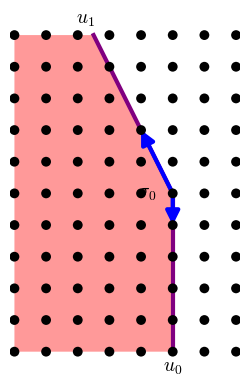

In [3]:
cone = Cone(corners) # cone is now the fibered cone in H_2(M, dM) corresponding to this veering triangulation.
cone_plot = cone.plot(mode='box', xmin = -5, xmax = 2, ymin = -5, ymax = 5)
cone_plot

Next we define a function which can take in any point in the fibered cone in homology and output it's Thurston norm. Probably a better way to find the Thurston norm would be to find a class's representative in terms of branch equations and just take half the number of triangles. I just need to understand better the matrix P in the above cell; that is, how to take a class in homology and go back to the branch equations.

In [4]:
def Thurston_norm_fLLQcbecdeepuwsua_nums(point):
    
    if not cone.interior_contains(point):
        raise ValueError('Your point is not in the fibered cone specified by the given veering triangulation')
    
    if len(point) != len(boundaries[0]):
        raise ValueError('Your point must be of dimension', len(boundaries[0]))          

    y1 = (point[1]/point[0])*x
    y2 = ((corners[1][1]-corners[0][1])/(corners[1][0]-corners[0][0]))*(x-corners[0][0])+corners[0][1]
        
    sol = solve(y1 == y2, x)[0].rhs()
    
    return point[0]/sol

In [5]:
Thurston_norm_fLLQcbecdeepuwsua_nums((-2,1))

10

The following cell will give the formula for the Thurston norm of a generic class. You just need to make sure that it is only intepreted in the cone.

In [6]:
y1 = (var('b')/var('a'))*x
y2 = ((corners[1][1]-corners[0][1])/(corners[1][0]-corners[0][0]))*(x-corners[0][0])+corners[0][1]

general_tnorm = var('a')/solve(y1 == y2, x)[0].rhs()
general_tnorm

-6*a - 2*b

Now we work on calculating the number of boundary components for a given class.

In [7]:
# Don't use this.

surface_b_pos = (var('b'), 0, 0, 0, 0, 0, -var('a'), 0, 0, 0)
surface_b_neg = (0, 0, 0, 0, 0, 0, -var('a'), 0, -var('b'), 0)
surface_b_zero = (1, 0, 0, 0, 0, 0, -var('a'), 0, 1, 0, 0)

faces_in_hom = taut_homology.faces_in_homology(tri, angle, [])

boundary1_b_pos = taut_carried.boundary_cycles_from_surface(tri, angle, surface_b_pos)[0]
boundary2_b_pos = taut_carried.boundary_cycles_from_surface(tri, angle, surface_b_pos)[1]
boundary1_b_neg = taut_carried.boundary_cycles_from_surface(tri, angle, surface_b_neg)[0]
boundary2_b_neg = taut_carried.boundary_cycles_from_surface(tri, angle, surface_b_neg)[1]
boundary1_b_zero = taut_carried.boundary_cycles_from_surface(tri, angle, surface_b_zero)[0]
boundary2_b_zero = taut_carried.boundary_cycles_from_surface(tri, angle, surface_b_zero)[1]

class1_b_pos = vector((0,0))
for i in range(len(boundary1_b_pos)):
    new = vector(boundary1_b_pos[i]*vector(faces_in_hom[i]))
    class1_b_pos = class1_b_pos + new
class2_b_pos = vector((0,0))
for i in range(len(boundary2_b_pos)):
    new = vector(boundary2_b_pos[i]*vector(faces_in_hom[i]))
    class2_b_pos = class2_b_pos + new
        
class1_b_neg = vector((0,0))
for i in range(len(boundary1_b_neg)):
    new = vector(boundary1_b_neg[i]*vector(faces_in_hom[i]))
    class1_b_neg = class1_b_neg + new
class2_b_neg = vector((0,0))
for i in range(len(boundary2_b_neg)):
    new = vector(boundary2_b_neg[i]*vector(faces_in_hom[i]))
    class2_b_neg = class2_b_neg + new
        
class1_b_zero = vector((0,0))
for i in range(len(boundary1_b_zero)):
    new = vector(boundary1_b_zero[i]*vector(faces_in_hom[i]))
    class1_b_zero = class1_b_zero + new
class2_b_zero = vector((0,0))
for i in range(len(boundary2_b_zero)):
    new = vector(boundary2_b_zero[i]*vector(faces_in_hom[i]))
    class2_b_zero = class2_b_zero + new
    
print(class1_b_pos)
print(class2_b_pos)
print(class1_b_neg)
print(class2_b_neg)
print(class1_b_zero)
print(class2_b_zero)

(2*b, b)
(-2*b, -b)
(2*b, b)
(-2*b, -b)
(0, 0)
(0, 0)


Let's try another method for finding the boundaries.

In [8]:
surf1 = rays[0] # These are the rays corresponding to the two extreme rays of the cone.
surf2 = rays[1]

boundary11, boundary12 = taut_carried.boundary_cycles_from_surface(tri, angle, surf1) # first and second boundaries on the first surface
boundary21, boundary22 = taut_carried.boundary_cycles_from_surface(tri, angle, surf2) # first and second boundaries on the second surface

faces_in_hom = taut_homology.faces_in_homology(tri, angle, [])

class11 = vector((0,0))
for i in range(len(boundary11)):
    new = vector(boundary11[i]*vector(faces_in_hom[i]))
    class11 = class11 + new
    
class12 = vector((0,0))
for i in range(len(boundary12)):
    new = vector(boundary12[i]*vector(faces_in_hom[i]))
    class12 = class12 + new
    
class21 = vector((0,0))
for i in range(len(boundary21)):
    new = vector(boundary21[i]*vector(faces_in_hom[i]))
    class21 = class21 + new
    
class22 = vector((0,0))
for i in range(len(boundary22)):
    new = vector(boundary22[i]*vector(faces_in_hom[i]))
    class22 = class22 + new

In [9]:
print(class11, class12, class21, class22)

(-1, 0) (1, 0) (2, 1) (-2, -1)


In [10]:
# This simply calculates the boundary of a class by writing that class as a linear combination of the two extreme
# vectors of the cone and using linearity of the boundary map.
def boundary(point):
    return ((-point[1]-2*point[0])*class11 - point[0]*class21, (-point[1]-2*point[0])*class12 - point[0]*class22)

In [11]:
boundary((var('a'),var('b')))

((b, -a), (-b, a))

In [12]:
# Now we have Tnorm(a,b) = 2g + b - 2
# so -6a-2b = 2g + gcd(b,-a) + gcd(-b,a) - 2 ==> g = -3a - b - gcd(a,b) + 1
def genus(point):
    return -3*point[0]-point[1]-gcd(point[0],point[1])+1

In the case when (a,b) is primitive, then gcd(a,b)=1 so that the genus is simply -3a-b-1, so we can realize all large genuses for example on the rays (-1,-i) which has genus 2+i.

In [13]:
def boundary_slopes(point):
    first_bound, second_bound = boundary(point)
    return (first_bound[1]/first_bound[0], second_bound[1]/second_bound[0])

In [14]:
boundary_slopes((-var('a'),var('a')))

(1, 1)

In [15]:
poly = taut_polynomial.taut_polynomial(tri, angle)
poly

a^6*b^2 - a^5*b^2 - a^4*b + a^3*b - a^2*b - a + 1

In [16]:
def dila(point):
    sols = solve(x^(6*point[0]+2*point[1])-x^(5*point[0]+2*point[1])-x^(4*point[0]+point[1])+x^(3*point[0]+point[1])-x^(2*point[0]+point[1])-x^(point[0])+1 == 0, x, to_poly_solve=True)
    sols2 = []
    for i in range(len(sols)):
        sols2.append(sols[i].rhs())
        
    for j in range(len(sols2)):
        sols2[j] = abs(sols2[j])
    
    return max(sols2)

In [17]:
def norm_dila_log(point):
    return Thurston_norm_fLLQcbecdeepuwsua_nums(point)*math.log(dila(point))

def norm_dila_exp(point):
    return dila(point)^Thurston_norm_fLLQcbecdeepuwsua_nums(point)

In [18]:
# Good sign that all these are the same since they are on the same ray.
for i in range(1,10):
    print(round(norm_dila_log((-i,i)), 10))

2.5318972768
2.5318972768
2.5318972768
2.5318972768
2.5318972768
2.5318972768
2.5318972768
2.5318972768
2.5318972768


In [19]:
for i in range(1,10):
    print(norm_dila_log((-i,-1)))

2.8334042010314127
2.742443589677062
2.712158981140295
2.6971154744404147
2.6881468525005734
2.682189694017363
2.6779491104758657
2.6747770126352473
2.672316968254196


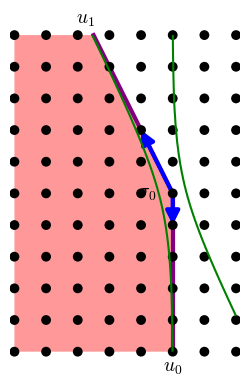

In [20]:
x,y = var('x,y')
levset = implicit_plot(exp(6*x+2*y)-exp(5*x+2*y)-exp(4*x+y)+exp(3*x+y)-exp(2*x+y)-exp(x)+1 == 0, (-5,2), (-5,5), cmap=['green'])
P = levset + cone_plot
P.show()

The above shows the level curve where the normalized dilatation is equal to the Thurston norm. So finding the point on this curve with the smallest Thurston norm is equivalent to finding the ray with minimal normalized dilatation. We do that with a Lagrange multipliers problem below.

In [21]:
f = lambda p: -6*p[0]-2*p[1]
c = lambda p: exp(6*p[0]+2*p[1])-exp(5*p[0]+2*p[1])-exp(4*p[0]+p[1])+exp(3*p[0]+p[1])-exp(2*p[0]+p[1])-exp(p[0])+1
d = lambda p: -exp(6*p[0]+2*p[1])+exp(5*p[0]+2*p[1])+exp(4*p[0]+p[1])-exp(3*p[0]+p[1])+exp(2*p[0]+p[1])+exp(p[0])-1

#test = minimize_constrained(f,[c,d],2*cone.rays()[0]+2*cone.rays()[1])
test = minimize_constrained(f,[c,d],[-2,-3])
test

/private/var/tmp/sage-9.6-current/local/var/lib/sage/venv-python3.10.3/lib/python3.10/site-packages/scipy/optimize/cobyla.py:34: DeprecationWarning: using len on a symbolic expression is deprecated; use method number_of_operands instead
See https://trac.sagemath.org/29738 for details.
  return func(*args, **kwargs)


(-0.6329978968361154, 0.6330450539292704)

In [22]:
x,y,L = var('x,y,L')
f(x,y) = -6*x-2*y
g(x,y) = exp(6*x+2*y)-exp(5*x+2*y)-exp(4*x+y)+exp(3*x+y)-exp(2*x+y)-exp(x)+1
h(x,y) = -exp(6*x+2*y)+exp(5*x+2*y)+exp(4*x+y)-exp(3*x+y)+exp(2*x+y)+exp(x)-1

test=minimize_constrained(f(x,y), [g(x,y),h(x,y)], [-2,2])
test

(-0.6330053383235367, 0.6330673778788892)

I used mathematica so solve the Lagrange multipliers problem above because sage can't do it for some reason...
The ray minimizing the normalized dilatation is (-1,1) which has normalized dilatation 2.53... as seen below.
Hironaka's example has 1.92... so it's not good enough.

In [23]:
norm_dila_log((-1,1))

2.5318972768037895

In [24]:
Cone([(test[0],test[1])]).Hilbert_basis()

N(-102188569810608, 102198585102817)
in 2-d lattice N

In [25]:
norm_dila_log((Cone([(test[0],test[1])]).Hilbert_basis()[0][0],Cone([(test[0],test[1])]).Hilbert_basis()[0][1]))

TypeError: ECL says: C-STACK overflow at size 8388608. Stack can probably be resized.
Proceed with caution.

In [26]:
start = time.time()
rat = Rational(test[1]/test[0])

end = time.time()
print(start-end)

-0.0003151893615722656


So the minimal normalized dilatation isn't quite small enough, but it would still be interesting to see if we can find examples of all large genus converging to the minimizer in this case. Can find all odds based on the below. Not sure about evens, might have to look harder.

Let's try to understand the basis for first homology which is used here. The theory is outlined in Section 4.2 of Anna Parlak's paper and here we will see how it is implemented.

First, let's just look at the details for this triangulation so we can see how the edges and faces are numbered and how they are glued:

In [27]:
print(tri.detail())

Size of the skeleton:
  Tetrahedra: 5
  Triangles: 10
  Edges: 5
  Vertices: 2

Tetrahedron gluing:
  Tet  |  glued to:      (012)      (013)      (023)      (123)
  -----+-------------------------------------------------------
    0  |               3 (102)    1 (201)    2 (203)    1 (023)
    1  |               0 (130)    4 (132)    0 (123)    4 (023)
    2  |               2 (130)    2 (201)    0 (203)    3 (132)
    3  |               0 (102)    4 (103)    4 (102)    2 (132)
    4  |               3 (203)    3 (103)    1 (123)    1 (031)

Vertices:
  Tet  |  vertex:    0   1   2   3
  -----+--------------------------
    0  |             0   1   0   0
    1  |             1   0   0   0
    2  |             0   0   0   0
    3  |             1   0   0   0
    4  |             0   1   0   0

Edges:
  Tet  |  edge:   01  02  03  12  13  23
  -----+--------------------------------
    0  |           0   1   2   0   3   4
    1  |           3   0   3   2   4   4
    2  |           1   1

Now using this information, we can construct the dual graph. The labeling of the vertices in the dual graph corresponds to the labeling of the tetrahedra in the triangulation; the labeling of the edges in the dual graph corresponds to the labeling of the faces in the triangulation; and the orientation of the edges in the dual graph is induced by the "upwards" coorientation on the faces in the triangulation.

![title](DualGraph.jpeg)

In the above we highlighted in purple the spanning tree which can be seen with the following command (the first list contains the tree faces, the second contains the non-tree faces, and the third is not relevant):

In [28]:
fundamental_domain.spanning_dual_tree(tri)

([0, 5, 7, 8], [1, 2, 3, 4, 6, 9], [0, 3, 2, 1, 2])

Also from the details of the triangulation, we should be able to construct the branch equations matrix (this is a little confusing and I need to think more about how to do it by hand, by the computer can do it for us allegedly). See Eq. $3.2$ in Parlak. (I'm also not sure why, but it seems to show up as the transpose of the dimensions I would expect...)

In [29]:
Matrix(taut_homology.edge_equation_matrix_taut(tri, angle))

[ 0  1  0  1  0  0  0  0 -1 -1]
[ 1  0  1  0  0  0 -2  1  0  0]
[ 0  1 -1  0  0  1  0 -1  0  1]
[ 0  1  0  1  0  0  0  0 -1 -1]
[ 0  0  1  1 -1 -2  1  1  1  0]

And we can nix the columns (shouldn't it be rows?) that correspond to tree faces:

In [30]:
Matrix(taut_homology.edge_equation_matrix_taut_reduced(tri, angle, []))

[ 1  0  1  0  0 -1]
[ 0  1  0  0 -2  0]
[ 1 -1  0  0  0  1]
[ 1  0  1  0  0 -1]
[ 0  1  1 -1  1  0]

As in Parlak, we put the above matrix into Smith Normal Form:

In [31]:
S, U, V = taut_homology.faces_in_smith(tri, angle, [])
S, U, V

(
[1 0 0 0 0]  [ 0  0  0  1  0  0]                  
[0 1 0 0 0]  [ 0  1  0  0  0  0]  [ 0  0  0  0  1]
[0 0 1 0 0]  [ 0  0  1  0  0  0]  [ 0  1 -1  1  0]
[0 0 0 1 0]  [ 0  0  2  2  0  1]  [-1  0 -1  1  0]
[0 0 0 0 0]  [ 0 -2 -2 -5 -1 -2]  [ 1  0  1  0 -1]
[0 0 0 0 0], [ 1  0 -2 -2  0 -1], [-1  0  0  0  0]
)

The matrix $U$ above transforms the standard basis $\{e_i\}_{i=1}^6$ of $\mathbb{Z}^{F_\mathcal{Y}}$ to a new basis:

In [32]:
print(Matrix(U)*vector((1,0,0,0,0,0)))
print(Matrix(U)*vector((0,1,0,0,0,0)))
print(Matrix(U)*vector((0,0,1,0,0,0)))
print(Matrix(U)*vector((0,0,0,1,0,0)))
print(Matrix(U)*vector((0,0,0,0,1,0)))
print(Matrix(U)*vector((0,0,0,0,0,1)))

(0, 0, 0, 0, 0, 1)
(0, 1, 0, 0, -2, 0)
(0, 0, 1, 2, -2, -2)
(1, 0, 0, 2, -5, -2)
(0, 0, 0, 0, -1, 0)
(0, 0, 0, 1, -2, -1)


As $\text{rank}(H_1(M, \mathbb{Z})) = 2$, the last two entries of each vector above give a generating set for $H_1(M;\mathbb{Z})$. That is, $\{(0,1), (-2,0), (-2,-2), (-5,-2), (-1,0), (-2,-1)\}$ generate the first homology. This is exactly what we get if we do the following (including $(0,0)$ entries for the tree faces):

In [33]:
taut_homology.faces_in_homology(tri, angle, [])

[(0, 0),
 (0, 1),
 (-2, 0),
 (-2, -2),
 (-5, -2),
 (0, 0),
 (-1, 0),
 (0, 0),
 (0, 0),
 (-2, -1)]

In terms of loops in the manifold: the following outputs a list of cycles in the dual graph (again labeled by dual graph edges which correspond to labelings of triangulation faces) where the $i^\text{th}$ entry of the list is the unique cycle in the dual graph formed by including the $i^\text{th}$ non-tree face into the spanning tree of the dual graph.

In [34]:
fundamental_domain.non_tree_face_loops(tri)

[[1, 5, 8, 0], [2, 7, 0], [3, 5, 8, 0], [4, 5], [6], [9, 8]]

The above loops generate $\pi_1(M)$ and hence their images in homology generate $H_1(M; \mathbb{Z})$. The elements above show exactly the image of these loops in homology. In particular, if we want a basis (not just a generating set), we can obtain that by looking at the last two columns of the matrix $U$ which are $(0,0,0,0,-1,0)$ and $(0,0,0,1,-2,-1)$.

This says that as a basis for $H_1(M; \mathbb{Z})$, we are choosing for the first element, the negative of the cycle corresponding to the $5$th non-tree face and for the second element, the fourth non-tree face minus 2 times the fifth minus the sixth.

Looking at these elements in homology, we see (just doing the addition by hand) that we get that basis $-(-1,0) = (1,0)$ and $(-5,-2) - 2(-1,0) - (-2,-1) = (-1,-1)$ and $\{(1,0), (-1,-1)\}$ is a basis for $\mathbb{Z}^2$.

Of course we can look at the previous code block to interpret these elements as loops in the manifold.

Now given a surface (specified as solutions to the branch equations), we can find the loops in the dual graph (specified in terms of which edges they go through and how many times) which are homotopic to the boundary components of the surface.

The first list gives the loop(s) in the dual graph homotopic to the boundary component(s) of the surface which lie on the first boundary torus of $M$ and the second list gives the loop(s) in the dual graph homotopic to the boundary component(s) of the surface which lie on the second boundary torus of $M$.

In [55]:
taut_carried.boundary_cycles_from_surface(tri, angle, taut_polytope.taut_rays(sig)[0])

[[1, 1, 0, 0, -1, 0, 0, 0, 2, 3], [-1, -1, 0, 0, 1, 0, 0, 0, -2, -3]]

In [84]:
def add_inverse_edges(graph):
    for edge in graph.edges():
        if not graph.has_edge(edge[1], edge[0]) and edge[0] != edge[1]:
            graph.add_edge(edge[1], edge[0], label = ['-' + str(edge[2][0])])
        elif graph.has_edge(edge[1], edge[0]) and edge[0] != edge[1]:
            for i in graph.edge_iterator([edge[1]]):
                if (i[0],i[1]) == (edge[1], edge[0]):
                    graph.set_edge_label(edge[1], edge[0], [i[2][0], '-' + str(edge[2][0])])

In [356]:
add_inverse_edges(dualGraph)
dualGraph.edges()

[(0, 1, [3, '-1']), (0, 2, ['-2']), (0, 3, [0]), (1, 0, [1, '-3']), (1, 4, [4, '-5']), (2, 0, [2]), (2, 2, [6]), (2, 3, ['-7']), (3, 0, ['-0']), (3, 2, [7]), (3, 4, [9, '-8']), (4, 1, [5, '-4']), (4, 3, [8, '-9'])]

In [358]:
dualGraph.all_simple_cycles()

[[2, 2],
 [0, 1, 0],
 [0, 2, 0],
 [0, 3, 0],
 [1, 4, 1],
 [2, 3, 2],
 [3, 4, 3],
 [0, 2, 3, 0],
 [0, 3, 2, 0],
 [0, 1, 4, 3, 0],
 [0, 3, 4, 1, 0],
 [0, 1, 4, 3, 2, 0],
 [0, 2, 3, 4, 1, 0]]

In [95]:
def get_all_simple_cycles_by_edge_labels(graph):
    cycles_by_vertex = graph.all_simple_cycles()
    edges = graph.edges(labels = False)
    all_cycles = []
    for cycle in cycles_by_vertex:
        face_labeled_cycle = []
        #if len(cycle > 2):
        for i in range(len(cycle)-1):
            edge_index = list(edges).index((cycle[i], cycle[i+1]))
            face_labeled_cycle.append(graph.edges()[edge_index][2])
        all_cycles.append(face_labeled_cycle)
        #else:
        #    edge_index = list(edges).index
        #    all_cycles.append()
        
    return all_cycles

In [100]:
get_all_simple_cycles_by_edge_labels(dualGraph)

NameError: name 'dualGraph' is not defined

In [96]:
def get_all_undirected_simple_cycles_by_edge_labels(graph):
    graph = add_inverse_edges(graph)
    new = []
    prelim_cycles = get_all_simple_cycles_by_edge_labels(graph)
    for i in range(len(prelim_cycles)):
        current = list(itertools.product(*all_simple_cycles_by_edge_labels(graph)[i]))
        for item in current:
            new.append(item)
            
    return new

In [99]:
G = get_directed_dual_graph(sig)
add_inverse_edges(G)
get_all_undirected_simple_cycles_by_edge_labels(G)

AttributeError: 'NoneType' object has no attribute 'all_simple_cycles'

In [362]:
new = []
prelim_cycles = all_simple_cycles_by_edge_labels(dualGraph)
for i in range(len(prelim_cycles)):
    current = list(itertools.product(*all_simple_cycles_by_edge_labels(dualGraph)[i]))
    for item in current:
        new.append(item)
            
new

[(6,),
 (3, 1),
 (3, '-3'),
 ('-1', 1),
 ('-1', '-3'),
 ('-2', 2),
 (0, '-0'),
 (4, 5),
 (4, '-4'),
 ('-5', 5),
 ('-5', '-4'),
 ('-7', 7),
 (9, 8),
 (9, '-9'),
 ('-8', 8),
 ('-8', '-9'),
 ('-2', '-7', '-0'),
 (0, 7, 2),
 (3, 4, 8, '-0'),
 (3, 4, '-9', '-0'),
 (3, '-5', 8, '-0'),
 (3, '-5', '-9', '-0'),
 ('-1', 4, 8, '-0'),
 ('-1', 4, '-9', '-0'),
 ('-1', '-5', 8, '-0'),
 ('-1', '-5', '-9', '-0'),
 (0, 9, 5, 1),
 (0, 9, 5, '-3'),
 (0, 9, '-4', 1),
 (0, 9, '-4', '-3'),
 (0, '-8', 5, 1),
 (0, '-8', 5, '-3'),
 (0, '-8', '-4', 1),
 (0, '-8', '-4', '-3'),
 (3, 4, 8, 7, 2),
 (3, 4, '-9', 7, 2),
 (3, '-5', 8, 7, 2),
 (3, '-5', '-9', 7, 2),
 ('-1', 4, 8, 7, 2),
 ('-1', 4, '-9', 7, 2),
 ('-1', '-5', 8, 7, 2),
 ('-1', '-5', '-9', 7, 2),
 ('-2', '-7', 9, 5, 1),
 ('-2', '-7', 9, 5, '-3'),
 ('-2', '-7', 9, '-4', 1),
 ('-2', '-7', 9, '-4', '-3'),
 ('-2', '-7', '-8', 5, 1),
 ('-2', '-7', '-8', 5, '-3'),
 ('-2', '-7', '-8', '-4', 1),
 ('-2', '-7', '-8', '-4', '-3')]

In [157]:
def get_edge_in_dual_graph_from_face_label(label):
    for edge in dualGraph.edges():
        if edge[2] == label:
            return edge

In [63]:
def get_directed_dual_graph(sig):
    tri, angle = taut.isosig_to_tri_angle(sig)
    G = DiGraph(loops = True, multiedges = True)
    top_bottom = transverse_taut.top_bottom_embeddings_of_faces(tri, angle)
    for face in tri.triangles():
        if face.embedding(0) in top_bottom[1]:
            G.add_edge(int(str(face.embedding(1))[0]), int(str(face.embedding(0))[0]), [face.index()])
        else:
            G.add_edge(int(str(face.embedding(0))[0]), int(str(face.embedding(1))[0]), [face.index()])
    return G

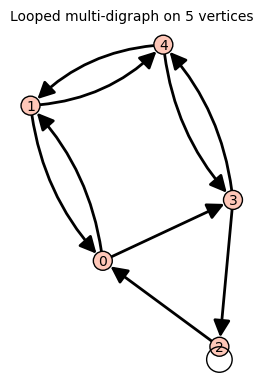

In [69]:
G = get_directed_dual_graph(sig)
G

In [70]:
G.edges()

[(0, 1, [3]), (0, 3, [0]), (1, 0, [1]), (1, 4, [4]), (2, 0, [2]), (2, 2, [6]), (3, 2, [7]), (3, 4, [9]), (4, 1, [5]), (4, 3, [8])]

In [4]:
P = taut_polytope.projection_to_homology(sig)

In [5]:
P

[ 0  0  0  0  0  0 -1  0  0  0]
[ 1  1  0  0  0  1  0  0 -1  0]